In [27]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

import importlib
import lib.ting_utils

importlib.reload(lib.ting_utils)
from lib.ting_utils import getSampledSignal
from lib.ting_utils import getSampledVariation
from lib.ting_utils import getVariationDistribution

In [2]:
datetime_str = '09/19/18 13:55:26'

datetime_object = datetime.strptime(datetime_str, '%m/%d/%y %H:%M:%S')

print(type(datetime_object))
print(datetime_object)  # printed in default format

<class 'datetime.datetime'>
2018-09-19 13:55:26


In [3]:
df = pd.read_csv('csvs/1hour_filtered_3DCA95.csv')

In [4]:
x = df['time']
y = df['data']

In [5]:
x = range(150)

In [6]:
y

0      57.746656
1      55.006280
2      54.922222
3      57.168713
4      58.302514
         ...    
145    65.892476
146    72.014070
147    71.777084
148    66.139733
149    58.006331
Name: data, Length: 150, dtype: float64

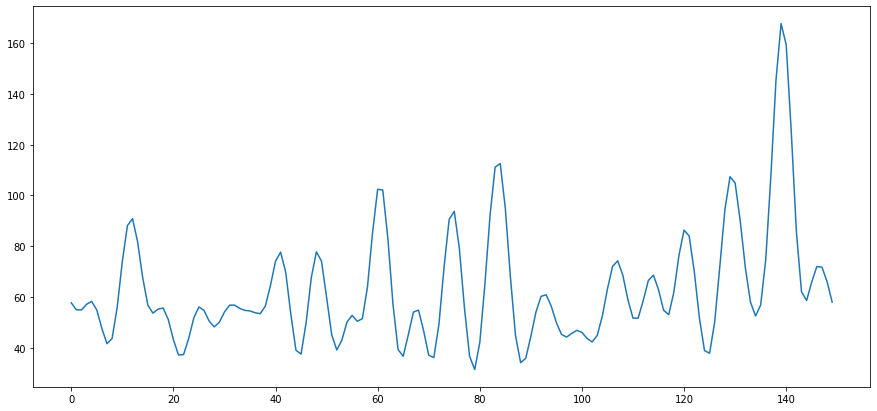

In [7]:
plt.figure(figsize=(15,7))
plt.plot(x, y)

## Get sampled signal

In [8]:
sampled_y = getSampledSignal(y, x, 15, sampling_offset=0)

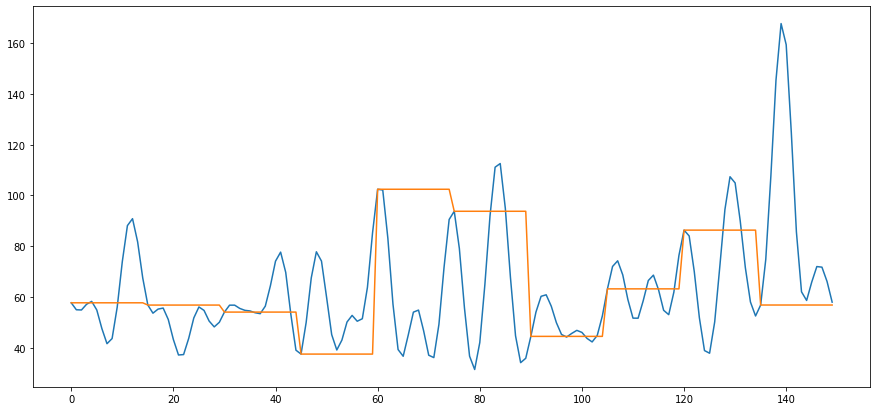

In [9]:
plt.figure(figsize=(15,7))
plt.plot(x, y)
plt.plot(x, sampled_y)

## Get total variation

In [34]:
win_int = (60,90)
for i in range(2, 61, 2):
    print('Interval:',i,getVariationDistribution(y, x, i, window_interval=win_int))

# var_2 = getVariationDistribution(y, x, 2, window_interval=(60,90))
# var_5 = getVariationDistribution(y, x, 5, window_interval=(60,90))
# var_15 = getVariationDistribution(y, x, 15, window_interval=(60,90))
# var_30 = getVariationDistribution(y, x, 30, window_interval=(60,90))
# var_60 = getVariationDistribution(y, x, 60, window_interval=(60,90))

# print(var_2)
# print(var_5)
# print(var_15)
# print(var_30)
# print(var_60)

Interval: 2 (200.42413998066866, 20.829537019919755)
Interval: 4 (556.5873000197372, 72.32769654702471)
Interval: 6 (757.7047115086466, 128.7052451154324)
Interval: 8 (810.6600881034858, 148.56228024414463)
Interval: 10 (796.4910845753196, 117.362079767054)
Interval: 12 (795.3125790437058, 167.88102987262553)
Interval: 14 (787.1595527785702, 133.91544092603073)
Interval: 16 (776.9723432342277, 139.5813094025713)
Interval: 18 (786.4313749577302, 148.16461056287278)
Interval: 20 (790.9333793004956, 153.27457816673706)
Interval: 22 (786.4670430788792, 162.0515805080551)
Interval: 24 (774.7837169452321, 159.22247332147862)
Interval: 26 (764.5709315019925, 118.05877986543554)
Interval: 28 (761.152054898817, 120.84020528948818)
Interval: 30 (768.9846847467278, 145.50298652014138)
Interval: 32 (774.9755619259105, 141.8713536070891)
Interval: 34 (770.7879955721469, 140.22320102490852)
Interval: 36 (757.2356306328754, 136.07138487654555)
Interval: 38 (750.222445891142, 135.9550325360581)
Interv

In [17]:
sample_interval = 15
sampled_ys = []
for i in range(sample_interval):
    sampled_y_offset = getSampledSignal(y, x, sample_interval, sampling_offset=i)
    sampled_ys.append(sampled_y_offset)
    
    var = getSampledVariation(y, x, sample_interval, sampling_offset=i)
    
    print('Offset:',i,'Variation:',var)

Offset: 0 Variation: 2794.1612938289277
Offset: 1 Variation: 2678.7258617193747
Offset: 2 Variation: 2534.870277213503
Offset: 3 Variation: 2736.3585027435024
Offset: 4 Variation: 3273.7940790357916
Offset: 5 Variation: 3352.7208244324997
Offset: 6 Variation: 3121.4877861616947
Offset: 7 Variation: 3062.3389470863453
Offset: 8 Variation: 3116.3651569884278
Offset: 9 Variation: 3208.7301518103636
Offset: 10 Variation: 3418.681581903138
Offset: 11 Variation: 3515.965530079841
Offset: 12 Variation: 3409.316180346487
Offset: 13 Variation: 3375.093452662861
Offset: 14 Variation: 3489.9243409908186


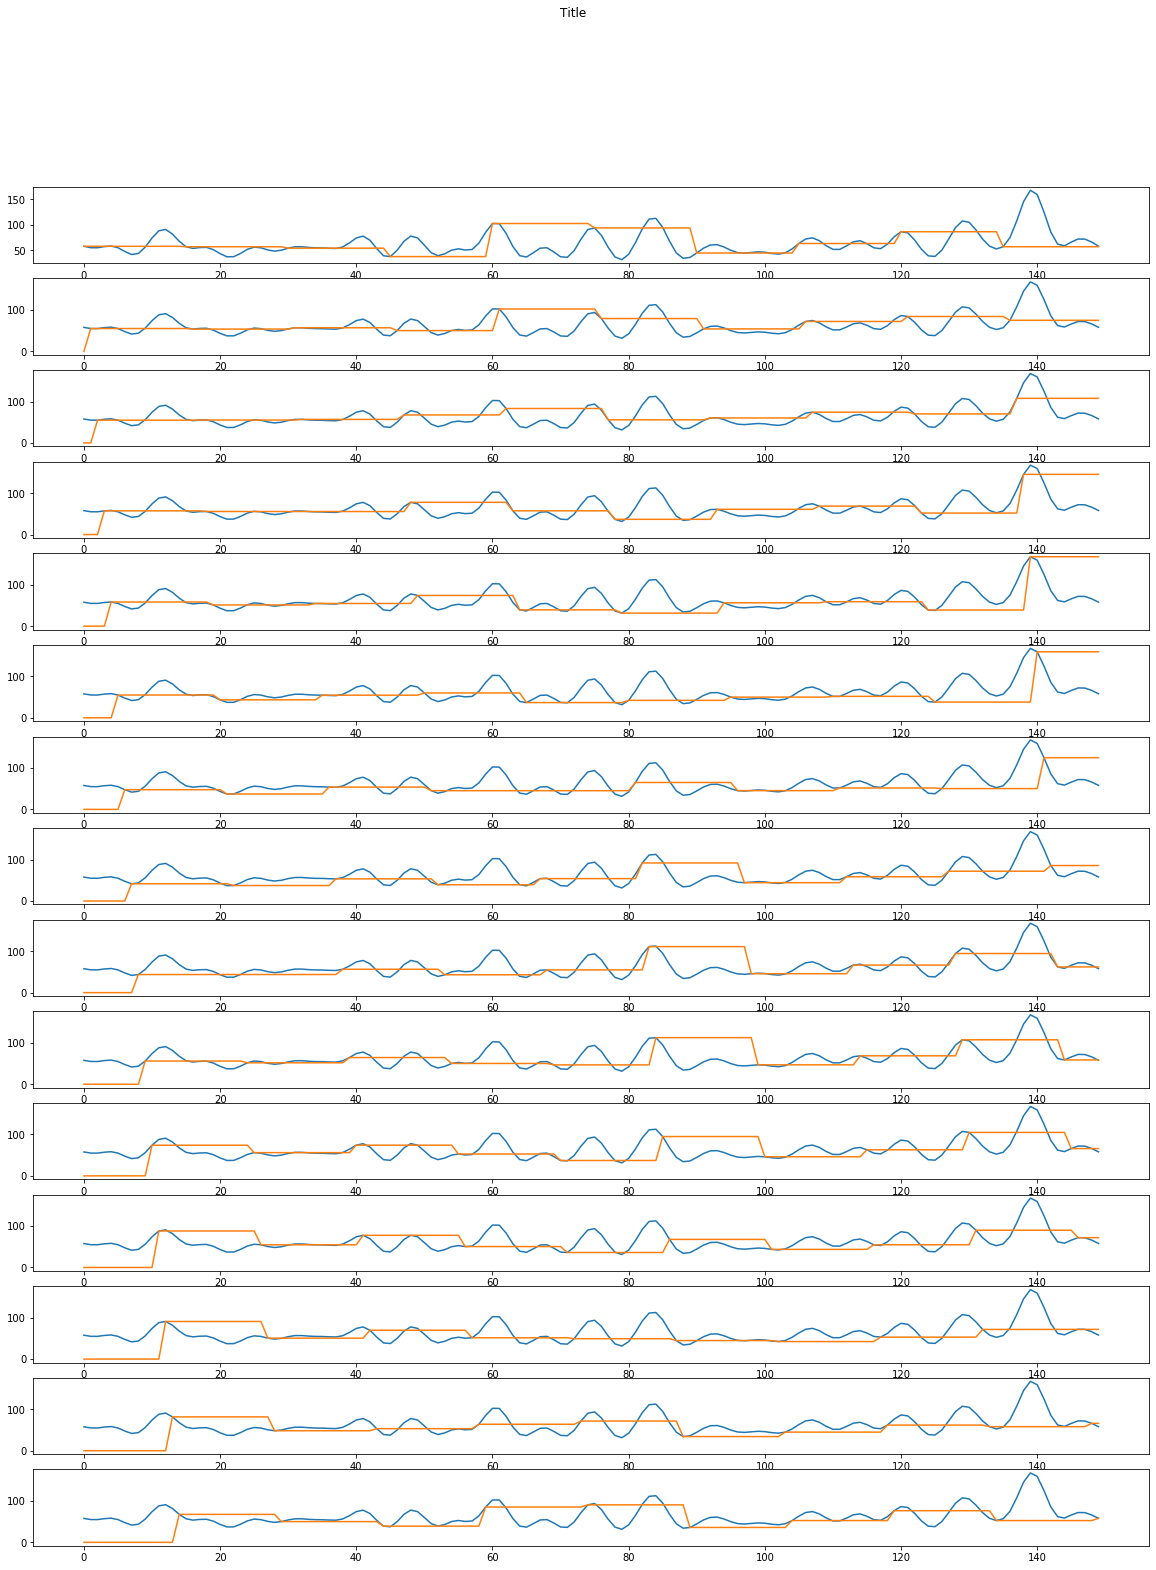

In [18]:
## VISUALISATION

# Plot
fig, axs = plt.subplots(sample_interval, figsize=(20,25))
fig.suptitle('Title')

for i in range(sample_interval):
    axs[i].plot(x, y)
    axs[i].plot(x, sampled_ys[i])

#axs[2].set_xticks(np.arange(min(x), max(x), 10))

In [19]:
sample_interval = 30
sampled_ys = []
for i in range(sample_interval):
    sampled_y_offset = getSampledSignal(y, x, sample_interval, sampling_offset=i)
    sampled_ys.append(sampled_y_offset)
    var = getSampledVariation(y, x, sample_interval, sampling_offset=i)

In [ ]:
## VISUALISATION

# Plot
fig, axs = plt.subplots(sample_interval, figsize=(20,50))
fig.suptitle('Title')

for i in range(sample_interval):
    axs[i].plot(x, y)
    axs[i].plot(x, sampled_ys[i])

#axs[2].set_xticks(np.arange(min(x), max(x), 10))